In [92]:
import numpy as np
import pandas as pd

In [93]:
data = pd.read_csv(r"C:\Users\Nandini\OneDrive\Attachments\excelppt\deld.csv")

In [94]:
data.head


<bound method NDFrame.head of       Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0         90.0        42.0       43.0    20.879744  82.002744  6.502985   
1         85.0        58.0       41.0    21.770462  80.319644  7.038096   
2         60.0        55.0       44.0    23.004459  82.320763  7.840207   
3         74.0        35.0       40.0    26.491096  80.158363  6.980401   
4         78.0        42.0       42.0    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
1895     107.0        34.0       32.0    26.774637  66.413269  6.780064   
1896      99.0        15.0       27.0    27.417112  56.636362  6.086922   
1897     118.0        33.0       30.0    24.131797  67.225123  6.362608   
1898     117.0        32.0       34.0    26.272418  52.127394  6.758793   
1899     104.0        18.0       30.0    23.603016  60.396475  6.779833   

        rainfall Soil Type sowing  month       Type  harvest period  

In [95]:
data['temperature'].max()


35.99009679

In [96]:
data['humidity'].max()

94.96419851

In [97]:
data.columns

Index(['Nitrogen', 'Phosporous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'Soil Type', 'sowing  month', 'Type', 'harvest period',
       'label'],
      dtype='object')

In [98]:
# Dropping columns which are not required for our project
data = data.drop(['Potassium','harvest period','Nitrogen','Phosporous','Soil Type','rainfall','sowing  month','ph'], axis=1)

In [99]:
data

,temperature,humidity,Type,label
0,20.879744,82.002744,Grain,rice
1,21.770462,80.319644,Grain,rice
2,23.004459,82.320763,Grain,rice
3,26.491096,80.158363,Grain,rice
4,20.130175,81.604873,Grain,rice
...,...,...,...,...
1895,26.774637,66.413269,cash crop,coffee
1896,27.417112,56.636362,cash crop,coffee
1897,24.131797,67.225123,cash crop,coffee
1898,26.272418,52.127394,cash crop,coffee


In [100]:
data

,temperature,humidity,Type,label
0,20.879744,82.002744,Grain,rice
1,21.770462,80.319644,Grain,rice
2,23.004459,82.320763,Grain,rice
3,26.491096,80.158363,Grain,rice
4,20.130175,81.604873,Grain,rice
...,...,...,...,...
1895,26.774637,66.413269,cash crop,coffee
1896,27.417112,56.636362,cash crop,coffee
1897,24.131797,67.225123,cash crop,coffee
1898,26.272418,52.127394,cash crop,coffee


In [101]:
# Data rows and columns
data.shape

(1900, 4)

In [102]:
# Printing null values
data.isna().sum()

temperature    1200
humidity       1200
Type           1200
label          1200
dtype: int64

In [103]:
# to check how are the null values filled
print(data.isna().sum())

temperature    1200
humidity       1200
Type           1200
label          1200
dtype: int64


In [104]:
# There are many null values so we will drop them as null values are associated with similar row
data = data.dropna()

In [105]:
data

,temperature,humidity,Type,label
0,20.879744,82.002744,Grain,rice
1,21.770462,80.319644,Grain,rice
2,23.004459,82.320763,Grain,rice
3,26.491096,80.158363,Grain,rice
4,20.130175,81.604873,Grain,rice
...,...,...,...,...
1895,26.774637,66.413269,cash crop,coffee
1896,27.417112,56.636362,cash crop,coffee
1897,24.131797,67.225123,cash crop,coffee
1898,26.272418,52.127394,cash crop,coffee


In [106]:
# Verified if the data null values are deleted as wastage of space
data.isna().sum()

temperature    0
humidity       0
Type           0
label          0
dtype: int64

In [107]:
# Count zeros for each column
# Therefore we have no values which are 0 in the dataset
zeros = (data == 0).sum()
print(zeros)

temperature    0
humidity       0
Type           0
label          0
dtype: int64


In [108]:
data.columns

Index(['temperature', 'humidity', 'Type', 'label'], dtype='object')

In [109]:

labels = data['label'].values
unique = np.unique(labels)

In [110]:
labels1 = data['Type'].values
unique1 = np.unique(labels1)

In [111]:
#Label Encoding for output 
unique

array(['Tomato', 'coffee', 'cotton', 'jute', 'mango', 'orange', 'rice'],
      dtype=object)

In [112]:
unique1

array(['Grain', 'Vegetable', 'cash crop', 'fruit'], dtype=object)

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le = LabelEncoder()

In [115]:
data

,temperature,humidity,Type,label
0,20.879744,82.002744,Grain,rice
1,21.770462,80.319644,Grain,rice
2,23.004459,82.320763,Grain,rice
3,26.491096,80.158363,Grain,rice
4,20.130175,81.604873,Grain,rice
...,...,...,...,...
1895,26.774637,66.413269,cash crop,coffee
1896,27.417112,56.636362,cash crop,coffee
1897,24.131797,67.225123,cash crop,coffee
1898,26.272418,52.127394,cash crop,coffee


In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:

# Apply one-hot encoding
data = pd.get_dummies(data, columns=['Type'])

# Display the result
print(data)

      temperature   humidity   label  Type_Grain  Type_Vegetable  \
0       20.879744  82.002744    rice        True           False   
1       21.770462  80.319644    rice        True           False   
2       23.004459  82.320763    rice        True           False   
3       26.491096  80.158363    rice        True           False   
4       20.130175  81.604873    rice        True           False   
...           ...        ...     ...         ...             ...   
1895    26.774637  66.413269  coffee       False           False   
1896    27.417112  56.636362  coffee       False           False   
1897    24.131797  67.225123  coffee       False           False   
1898    26.272418  52.127394  coffee       False           False   
1899    23.603016  60.396475  coffee       False           False   

      Type_cash crop  Type_fruit  
0              False       False  
1              False       False  
2              False       False  
3              False       False  
4       

In [118]:
print(data.head())  # Inspect the DataFrame

   temperature   humidity label  Type_Grain  Type_Vegetable  Type_cash crop  \
0    20.879744  82.002744  rice        True           False           False   
1    21.770462  80.319644  rice        True           False           False   
2    23.004459  82.320763  rice        True           False           False   
3    26.491096  80.158363  rice        True           False           False   
4    20.130175  81.604873  rice        True           False           False   

   Type_fruit  
0       False  
1       False  
2       False  
3       False  
4       False  


In [119]:
# Converting string values to int values
convert = ['Type_Grain', 'Type_Vegetable', 'Type_cash crop', 'Type_fruit']
data[convert] = data[convert].astype(int)

In [120]:
data

,temperature,humidity,label,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit
0,20.879744,82.002744,rice,1,0,0,0
1,21.770462,80.319644,rice,1,0,0,0
2,23.004459,82.320763,rice,1,0,0,0
3,26.491096,80.158363,rice,1,0,0,0
4,20.130175,81.604873,rice,1,0,0,0
...,...,...,...,...,...,...,...
1895,26.774637,66.413269,coffee,0,0,1,0
1896,27.417112,56.636362,coffee,0,0,1,0
1897,24.131797,67.225123,coffee,0,0,1,0
1898,26.272418,52.127394,coffee,0,0,1,0


In [121]:
unique

array(['Tomato', 'coffee', 'cotton', 'jute', 'mango', 'orange', 'rice'],
      dtype=object)

In [122]:
# Correct way to add the encoded column
data.loc[:, 'encoded_output'] = le.fit_transform(data['label'])

In [123]:
data['encoded_output']
data = data.drop(['label'],axis=1)

In [124]:
data

,temperature,humidity,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit,encoded_output
0,20.879744,82.002744,1,0,0,0,6
1,21.770462,80.319644,1,0,0,0,6
2,23.004459,82.320763,1,0,0,0,6
3,26.491096,80.158363,1,0,0,0,6
4,20.130175,81.604873,1,0,0,0,6
...,...,...,...,...,...,...,...
1895,26.774637,66.413269,0,0,1,0,1
1896,27.417112,56.636362,0,0,1,0,1
1897,24.131797,67.225123,0,0,1,0,1
1898,26.272418,52.127394,0,0,1,0,1


In [125]:
# Checking if correctly encoded
data[500:600]

,temperature,humidity,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit,encoded_output
1700,25.524690,72.248508,0,0,1,0,3
1701,26.591050,82.941641,0,0,1,0,3
1702,25.297818,86.887053,0,0,1,0,3
1703,25.721009,88.165136,0,0,1,0,3
1704,23.584193,72.004608,0,0,1,0,3
...,...,...,...,...,...,...,...
1795,23.874845,86.792613,0,0,1,0,3
1796,23.928879,88.071123,0,0,1,0,3
1797,24.814412,81.686889,0,0,1,0,3
1798,24.447439,82.286484,0,0,1,0,3


In [126]:
import seaborn as sns
import matplotlib.pyplot as plt


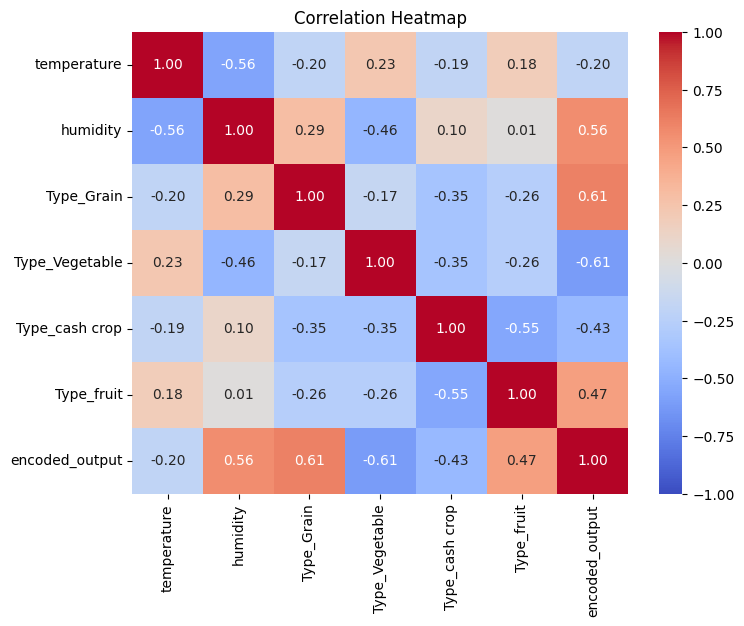

In [127]:
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [128]:
data.mean()

temperature       25.763794
humidity          70.873315
Type_Grain         0.142857
Type_Vegetable     0.142857
Type_cash crop     0.428571
Type_fruit         0.285714
encoded_output     3.000000
dtype: float64

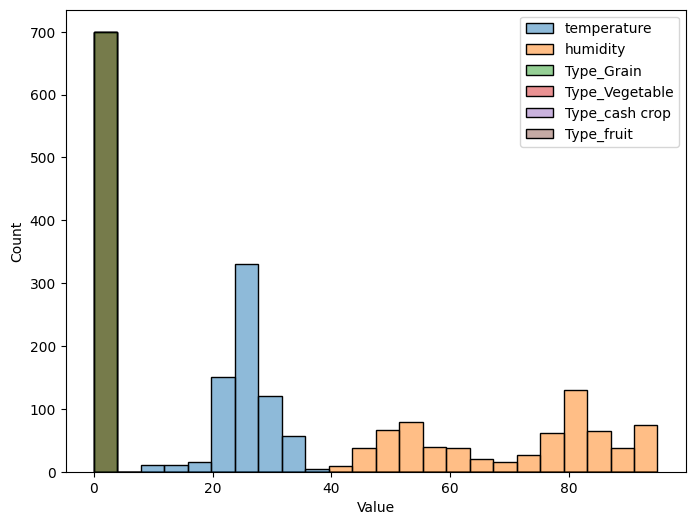

In [129]:
plt.figure(figsize=(8, 6))
sns.histplot(data.drop(['encoded_output'],axis=1), bins=24, kde=False)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = data.drop(['encoded_output'],axis=1)
y = data['encoded_output']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [134]:
X_train.shape[1]

6

In [135]:
def build_model(hp):
    model = Sequential()
    
    # Tune number of neurons in the first Dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    # Add hidden layers based on the hyperparameters
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=64, step=16),
                        activation='relu'))
    
    # Output layer (10 classes for the mnist dataset)
    model.add(Dense(10, activation='softmax'))
    
    # Compile model with tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])
    
    return model

In [136]:
import keras_tuner as kt
from tensorflow.keras.layers import Input, Dense


In [138]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=6,
    directory='my_dir',
    project_name='my_project'
)


# Perform hyperparameter search
tuner.search(X_train, y_train)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Reloading Tuner from my_dir\my_project\tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
32                |32                |units
1                 |3                 |num_layers
64                |96                |units_0
0.001             |0.0001            |learning_rate
128               |32                |units_1
128               |32                |units_2



Traceback (most recent call last):
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hyperm

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 123, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\Nandini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 553, in categorical_crossentropy
    raise ValueError(
ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)


In [159]:
def final_model():
    model = Sequential()
    
    # Input layer with 6 features
    model.add(Input(shape=(6,)))    
    
    # Additional hidden layers
    model.add(Dense(96, activation='relu'))  # First hidden layer with 64 neurons
    model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
    
    # Output layer (for multiclass classification with 7 classes)
    model.add(Dense(7, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

    return model

In [140]:
final_nn=final_model()

In [141]:
data


,temperature,humidity,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit,encoded_output
0,20.879744,82.002744,1,0,0,0,6
1,21.770462,80.319644,1,0,0,0,6
2,23.004459,82.320763,1,0,0,0,6
3,26.491096,80.158363,1,0,0,0,6
4,20.130175,81.604873,1,0,0,0,6
...,...,...,...,...,...,...,...
1895,26.774637,66.413269,0,0,1,0,1
1896,27.417112,56.636362,0,0,1,0,1
1897,24.131797,67.225123,0,0,1,0,1
1898,26.272418,52.127394,0,0,1,0,1


In [142]:
data['temperature'] = data['temperature']/data['temperature'].max()
data['humidity'] = data['humidity']/data['humidity'].max()
X = data.drop(['encoded_output'],axis=1)

data

,temperature,humidity,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit,encoded_output
0,0.580152,0.863512,1,0,0,0,6
1,0.604901,0.845789,1,0,0,0,6
2,0.639189,0.866861,1,0,0,0,6
3,0.736066,0.844090,1,0,0,0,6
4,0.559325,0.859323,1,0,0,0,6
...,...,...,...,...,...,...,...
1895,0.743945,0.699351,0,0,1,0,1
1896,0.761796,0.596397,0,0,1,0,1
1897,0.670512,0.707900,0,0,1,0,1
1898,0.729990,0.548916,0,0,1,0,1


In [143]:
y

0       6
1       6
2       6
3       6
4       6
       ..
1895    1
1896    1
1897    1
1898    1
1899    1
Name: encoded_output, Length: 700, dtype: int32

In [144]:
X

,temperature,humidity,Type_Grain,Type_Vegetable,Type_cash crop,Type_fruit
0,0.580152,0.863512,1,0,0,0
1,0.604901,0.845789,1,0,0,0
2,0.639189,0.866861,1,0,0,0
3,0.736066,0.844090,1,0,0,0
4,0.559325,0.859323,1,0,0,0
...,...,...,...,...,...,...
1895,0.743945,0.699351,0,0,1,0
1896,0.761796,0.596397,0,0,1,0
1897,0.670512,0.707900,0,0,1,0
1898,0.729990,0.548916,0,0,1,0


In [145]:
from tensorflow.keras.utils import to_categorical

# Assuming Y contains integer labels from 0 to 6
Y_encoded = to_categorical(y, num_classes=7)  # Set num_classes=7 for 7 output labels


In [146]:
Y_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [147]:
# First, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=4)


In [148]:
print("Training set:", X_train, y_train)
print("Test set:", X_test, y_test)

Training set:       temperature  humidity  Type_Grain  Type_Vegetable  Type_cash crop  \
159      0.752863  0.445032           0               1               0   
225      0.864065  0.499261           0               0               0   
324      0.584383  0.978939           0               0               0   
13       0.667266  0.864082           1               0               0   
1735     0.698086  0.902712           0               0               1   
...           ...       ...         ...             ...             ...   
1799     0.738376  0.777345           0               0               1   
360      0.501566  0.948144           0               0               0   
439      0.685029  0.796459           0               0               1   
174      0.815501  0.645017           0               1               0   
122      0.751444  0.519418           0               1               0   

      Type_fruit  
159            0  
225            1  
324            1  
13       

In [149]:
history = final_nn.fit(X_train, y_train, epochs=24, batch_size=24, validation_split=0.2)

Epoch 1/24
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3196 - loss: 1.8693 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6339 - val_loss: 1.6983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/24
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5885 - loss: 1.6466 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6429 - val_loss: 1.4334 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/24
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5916 - loss: 1.3905 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 1.1565 - val_precision: 1.0000 - val_recall: 0.1786
Epoch 4/24
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6667 - loss: 1.1418 - precision: 1.0000 - recall: 0.1259 - val_accuracy: 0.6964 - val_loss: 0.9403 - val_precision: 1.0000 - val_recall: 0.1875
Epoch 5/24
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7140 - loss: 0.9004 - precision: 1.0000 - recall: 0.2110 - val_

In [150]:
from sklearn.metrics import precision_recall_curve

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


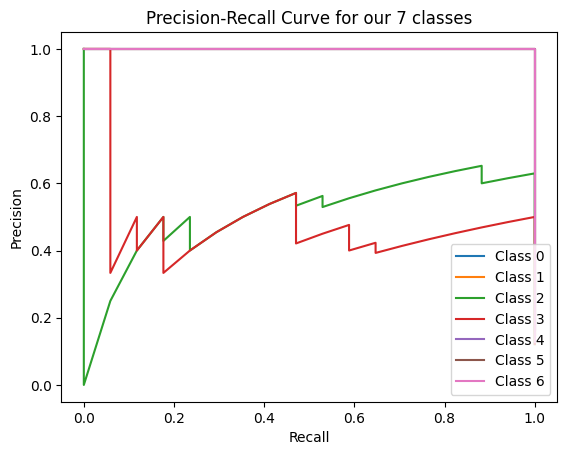

In [151]:
y_scores = final_nn.predict(X_test)

# Plot Precision-Recall curve for each class
plt.figure()

for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_scores[:, i])
    
    # Plot the curve for each class
    plt.plot(recall, precision, label=f'Class {i}')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for our 7 classes')
plt.legend(loc="lower right")
plt.show()

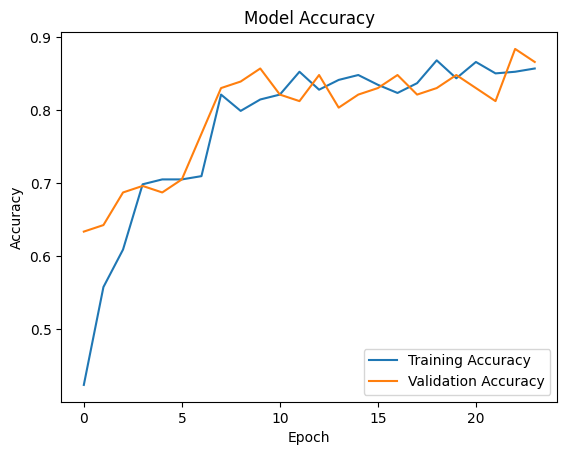

In [152]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [153]:
data.columns

Index(['temperature', 'humidity', 'Type_Grain', 'Type_Vegetable',
       'Type_cash crop', 'Type_fruit', 'encoded_output'],
      dtype='object')

In [182]:
temp = int(input("Enter temperature of the soil: "))

hum = int(input("Enter humidity of the soil "))

grain = int(input("Enter grain or not (0 or 1)"))

vege = int(input("Enter vegetable or not (0 or 1)"))

crop = int(input("Enter crop or not (0 or 1)"))

fruit = int(input("Enter fruit or not (0 or 1)"))


Enter temperature of the soil:  100
Enter humidity of the soil  100
Enter grain or not (0 or 1) 0
Enter vegetable or not (0 or 1) 0
Enter crop or not (0 or 1) 1
Enter fruit or not (0 or 1) 0


In [183]:
temp = temp/35.99009679
hum = hum/94.96419851

In [184]:
temp

2.7785421246153863

In [185]:
hum

1.0530284209103256

In [186]:
X_mytest = np.array([temp,hum,grain,vege,crop,fruit])

In [187]:
# prediction = final_nn.predict(X_mytest)

In [188]:
X_mytest = X_mytest.reshape(1, -1)

# Make predictions
predictions = final_nn.predict(X_mytest)

# Print the predicted class probabilities
print(predictions)

# Optionally, print the predicted class (class with highest probability)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[3.2466163e-05 9.7833955e-01 9.2073041e-04 2.7663803e-03 1.7740799e-02
  6.3040869e-07 1.9947904e-04]]
Predicted Class: [1]


In [173]:
decoded_labels = le.inverse_transform(y)
print("Decoded Labels:", decoded_labels)


Decoded Labels: ['rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato'
 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato'
 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato'
 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 'Tomato' 